<font face="Times New Roman" size=5><div dir=rtl align=center>
<font face="Times New Roman" size=5>
In The Name of God
</font>
<br> <br>
<img src="https://logoyar.com/content/wp-content/uploads/2021/04/sharif-university-logo.png" alt="University Logo" width="150" height="150">
<br>
<font face="Times New Roman" size=4 align=center>
Sharif University of Technology - Department of Computer
</font>
<br> <br>
<font color="#008080" size=5>
Introduction to Machine Learning
</font>

<hr/> <br>
<font color="#800080" size=6>
Chapter 4: Bagging & Boosting
<br>
</font>
<br>
<font face="Times New Roman" size=4>
:authors <br>
<b>OmidReza Heydari</b>
</font>
<hr>
</div></font>

<font  size=5><div dir=ltr>
<font face="Times New Roman" color="#008080" size=5>**Table of Contents**</font>
<br>

<font size=4>
<ul>
    <li>
        <a href="#1">
            1. Ensemble Methods
        </a>
    </li>
    <ul>
        <li>
            <a href="#1-1">
                1-1. Majority Voting
            </a>
        </li>
        <li>
            <a href="#1-2">
                1-2. Bagging
            </a>
        </li>
        <ul>
            <li>
                <a href="#1-2-1">
                    1-2-1. Out Of Bag Validation
                </a>
            </li>
        </ul>
        <li>
            <a href="#1-3">
                1-3. Pasting
            </a>
        </li>
    </ul>
</div>

<font face="Times New Roman"><div id="1">
# <font color="#800080" size=6>**1. Ensemble Methods**</font>
</div>

#### <font color="#008080" face="Times New Roman" size=4>**Dataset**</font>

##### <font color="#008080" face="Times New Roman" size=4> - Introduction to Dataset </font>

<font face="Times New Roman" size=3>
The dataset of this section belongs to a marketing campaign of a bank in Portugal. You can find more information about this dataset in this <a href="">link</a>.
</font>

##### <font color="#008080" face="Times New Roman" size=4> - Loading Dataset </font>

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv("../Files/bank-full.csv")
df.head(3)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no


##### <font color="#008080" face="Times New Roman" size=4> - More Information About Dataset </font>

In [3]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  Target     45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


##### <font color="#008080" face="Times New Roman" size=4> - Visualizing Dataset </font>

##### <font color="#008080" face="Times New Roman" size=4> - Pre-Processing Dataset</font>

In [5]:
from sklearn.preprocessing import LabelEncoder

# First of all we should change non-numerical values to numbers
encoder = LabelEncoder()
columns_to_encode = ['job', 'marital', 'education', 'month', 'contact', 'poutcome', 'housing', 'loan', 'Target', 'default']
for column_to_encode in columns_to_encode:
    encoder.fit(np.array(df[column_to_encode]))
    df[column_to_encode]=encoder.transform(df[column_to_encode])

In [6]:
# Next step is removing unknown rows
colums_have_unknow=['job', 'marital', 'education', 'default', 'housing', 'loan']
for colum_has_unknow in colums_have_unknow:
    df.drop(df[df[colum_has_unknow] == 'unknow'].index, inplace = True)

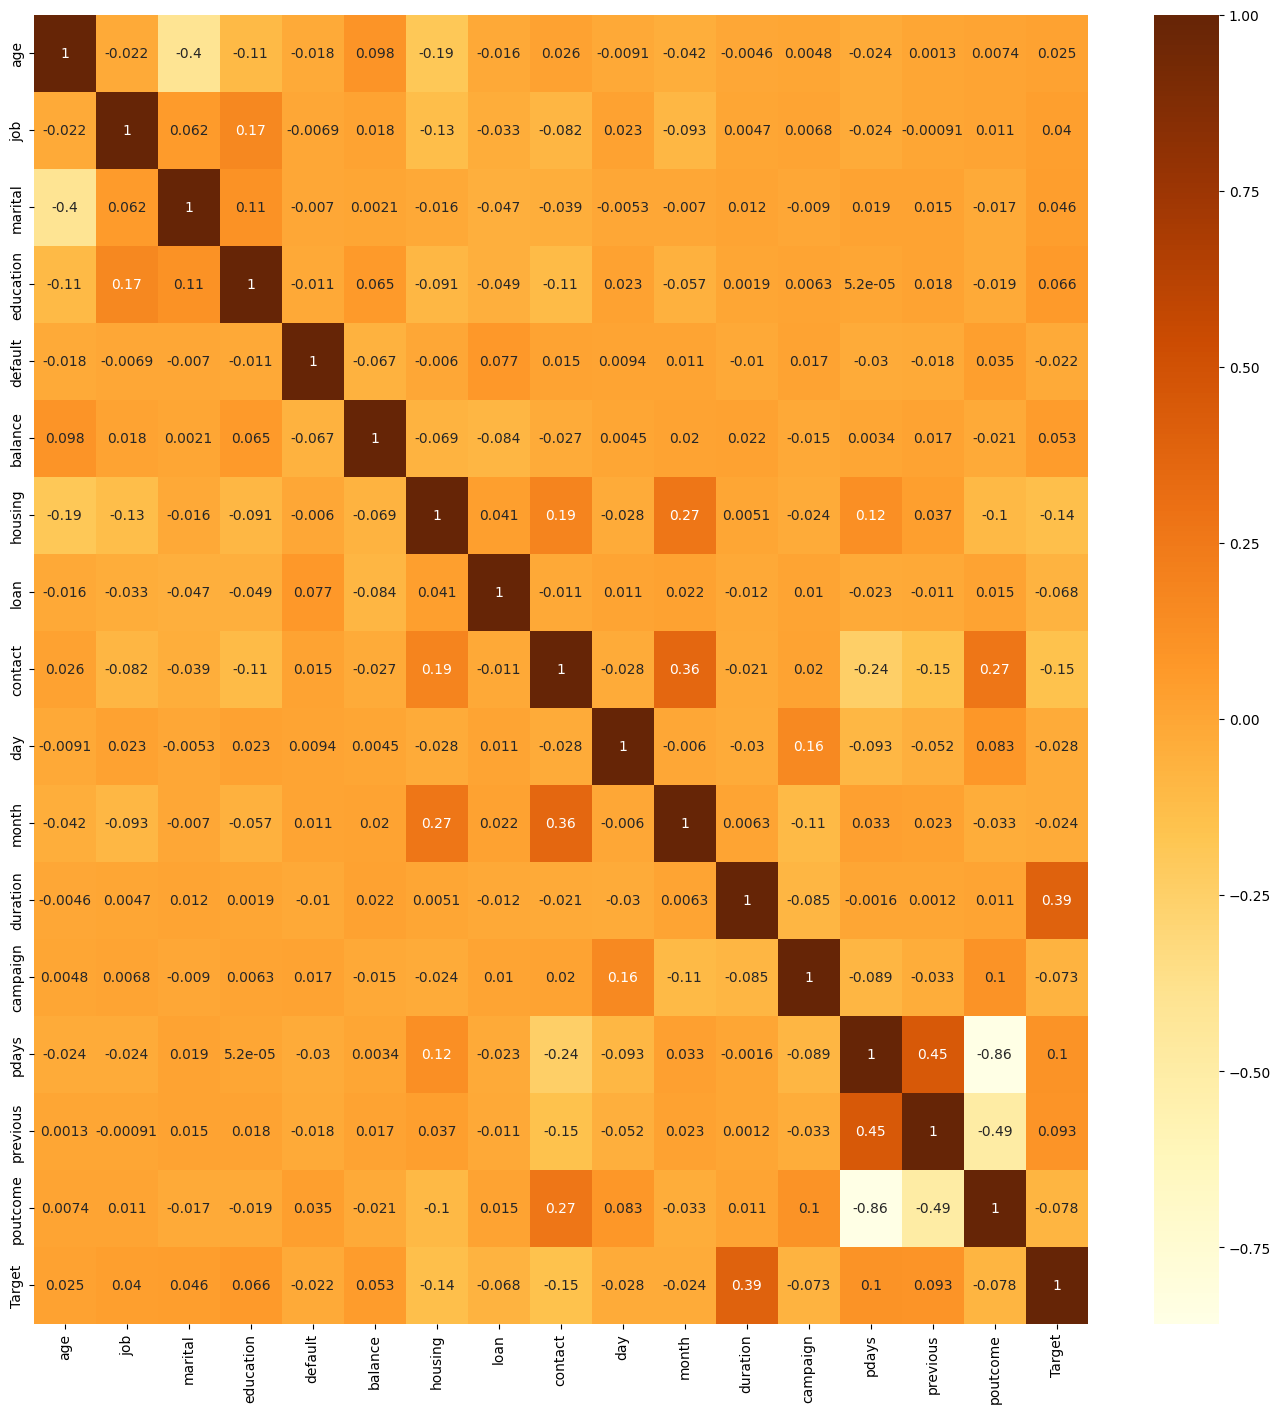

In [7]:
from sklearn.model_selection import train_test_split

# split labels and features
y = df["Target"].copy()
x = df.drop("Target", axis=1)

# split test and train data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.33, random_state = 42)

plt.figure(figsize=(17,17))
sns.heatmap(data = df.corr(), annot=True, cmap="YlOrBr")
plt.show()

<font face="Times New Roman"><div id="1-1">
## <font color="#800080" size=6>**1-1. Majority Voting** </font>
</div>

#### <font color="#008080" face="Times New Roman" size=4>**Model**</font>

In [8]:
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression

# Create models
log_clf = LogisticRegression(solver='lbfgs', max_iter=30000, random_state = 42)
dt_clf = DecisionTreeClassifier(random_state = 42)
svm_clf = SVC(random_state = 42)
hard_voting_clf = VotingClassifier(estimators=[('lr', log_clf), ('dt', dt_clf), ('svc', svm_clf)])

#### <font color="#008080" face="Times New Roman" size=4>**Train**</font>

In [9]:
from sklearn.metrics import accuracy_score

results = {}
for clf in (dt_clf, svm_clf, log_clf):
    clf.fit(x_train, y_train)
    y_pred = clf.predict(x_test)
    results[clf.__class__.__name__] = accuracy_score(y_test, y_pred)
    
hard_voting_clf.fit(x_train, y_train)

VotingClassifier(estimators=[('lr',
                              LogisticRegression(max_iter=30000,
                                                 random_state=42)),
                             ('dt', DecisionTreeClassifier(random_state=42)),
                             ('svc', SVC(random_state=42))])

#### <font color="#008080" face="Times New Roman" size=4>**Evaluation**</font>

In [11]:
y_pred = hard_voting_clf.predict(x_test)
results["HardVotingClassifier"] = accuracy_score(y_test, y_pred)

#### <font color="#008080" face="Times New Roman" size=4>**Visualization**</font>

/media/alireza/HDD/university/02-03/ml-ta/Introduction_to_Machine_Learning/venv/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/media/alireza/HDD/university/02-03/ml-ta/Introduction_to_Machine_Learning/venv/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/media/alireza/HDD/university/02-03/ml-ta/Introduction_to_Machine_Learning/venv/lib/python3.10/site-packages/seaborn/_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)
/media/alireza/HDD/university/02-03/ml-ta/In

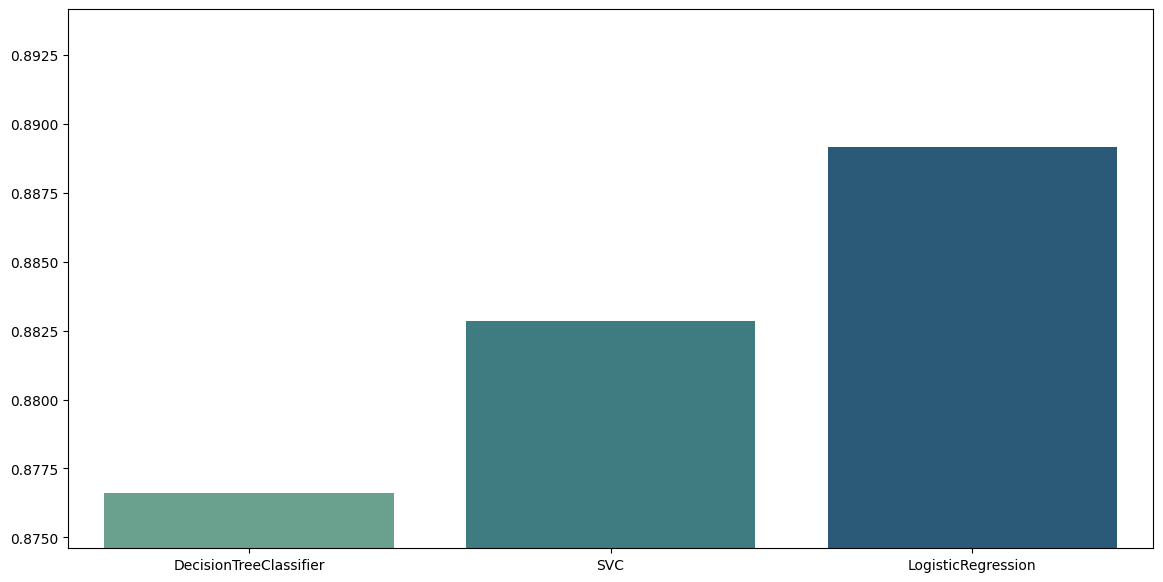

In [10]:
plt.figure(figsize=(14, 7))
ax = sns.barplot(x=list(results.keys()), y=list(results.values()), palette="crest")
ax.set_ylim([min(list(results.values()))-0.002, max(list(results.values()))+0.005])
plt.show()

<font face="Times New Roman"><div id="1-2">
## <font color="#800080" size=6>**1-2. Bagging** </font>
</div>

#### <font color="#008080" face="Times New Roman" size=4>**Model**</font>

In [12]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

bag_clf = BaggingClassifier(DecisionTreeClassifier(), n_estimators=2000, max_samples=400, bootstrap=True, n_jobs=-1)

#### <font color="#008080" face="Times New Roman" size=4>**Train**</font>

In [13]:
bag_clf.fit(x_train, y_train)

BaggingClassifier(estimator=DecisionTreeClassifier(), max_samples=400,
                  n_estimators=2000, n_jobs=-1)

#### <font color="#008080" face="Times New Roman" size=4>**Evaluation**</font>

##### <font color="#008080" face="Times New Roman" size=4> - Predict </font>

In [14]:
y_pred = bag_clf.predict(x_test)

##### <font color="#008080" face="Times New Roman" size=4> - Accuracy </font>

In [15]:
accuracy_score(y_test, y_pred)

0.8958445040214478

#### <font color="#008080" face="Times New Roman" size=4>**Visualization**</font>

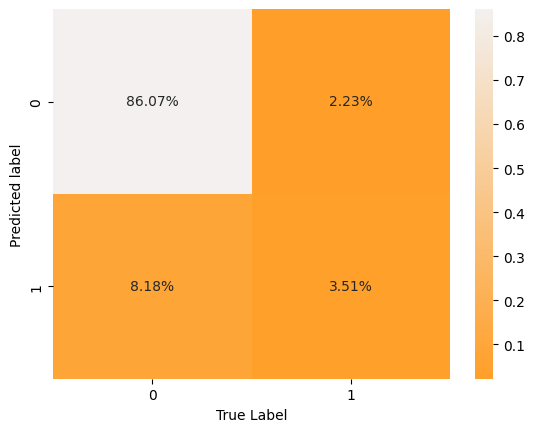

In [16]:
from sklearn.metrics import confusion_matrix

def show_confusion_matrix(y_test, y_pred):
  clr_plt = sns.light_palette("#FF9F29", reverse=True, as_cmap=True)
  cf_matrix = confusion_matrix(y_test, y_pred)
  sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, fmt='.2%',cmap=clr_plt)  
  plt.ylabel('Predicted label')
  plt.xlabel('True Label')
  plt.show
    
show_confusion_matrix(y_test, y_pred)

<font face="Times New Roman"><div id="1-2-1">
### <font color="#800080" size=5>**1-2-1. Out Of Bag Validation**</font>
</div>

In [ ]:
bag_clf = BaggingClassifier(DecisionTreeClassifier(), n_estimators=2000, bootstrap=True, n_jobs=-1, oob_score=True)
bag_clf.fit(x_train, y_train)
print("OOB Score: " + str(bag_clf.oob_score_))
print("Accuracy Score : "+ str(accuracy_score(y_test, bag_clf.predict(x_test))))

<font face="Times New Roman"><div id="1-3">
## <font color="#800080" size=6>**1-3. Pasting** </font>
</div>

#### <font color="#008080" face="Times New Roman" size=4>**Model**</font>

In [17]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

bag_clf = BaggingClassifier(DecisionTreeClassifier(), n_estimators=2000, max_samples=400, bootstrap=False, n_jobs=-1)

#### <font color="#008080" face="Times New Roman" size=4>**Train**</font>

In [18]:
bag_clf.fit(x_train, y_train)

BaggingClassifier(bootstrap=False, estimator=DecisionTreeClassifier(),
                  max_samples=400, n_estimators=2000, n_jobs=-1)

#### <font color="#008080" face="Times New Roman" size=4>**Evaluation**</font>

##### <font color="#008080" face="Times New Roman" size=4> - Predict </font>

In [19]:
y_pred = bag_clf.predict(x_test)

##### <font color="#008080" face="Times New Roman" size=4> - Accuracy </font>

In [20]:
accuracy_score(y_test, y_pred)

0.8959115281501341

#### <font color="#008080" face="Times New Roman" size=4>**Visualization**</font>

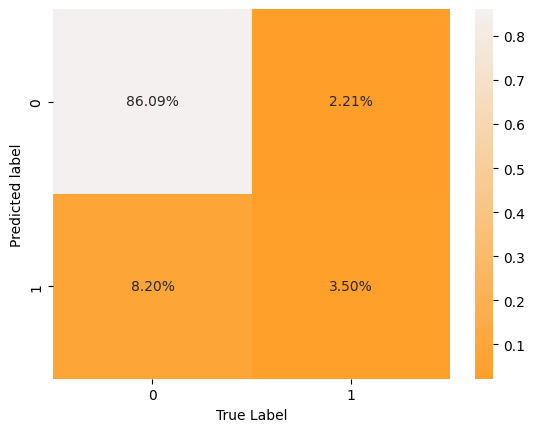

In [21]:
show_confusion_matrix(y_test, y_pred)

<font face="Times New Roman"><div id="1-3">
## <font color="#800080" size=6>**1-3. Kernel SVM**</font>
</div>

#### <font color="#008080" face="Times New Roman" size=4>**Dataset**</font>

##### <font color="#008080" face="Times New Roman" size=4> - Loading Dataset </font>

In [41]:
# create dataset
X, y = datasets.make_circles(200, factor=0.1, noise=0.1, random_state=1)

##### <font color="#008080" face="Times New Roman" size=4> - Visualization </font>

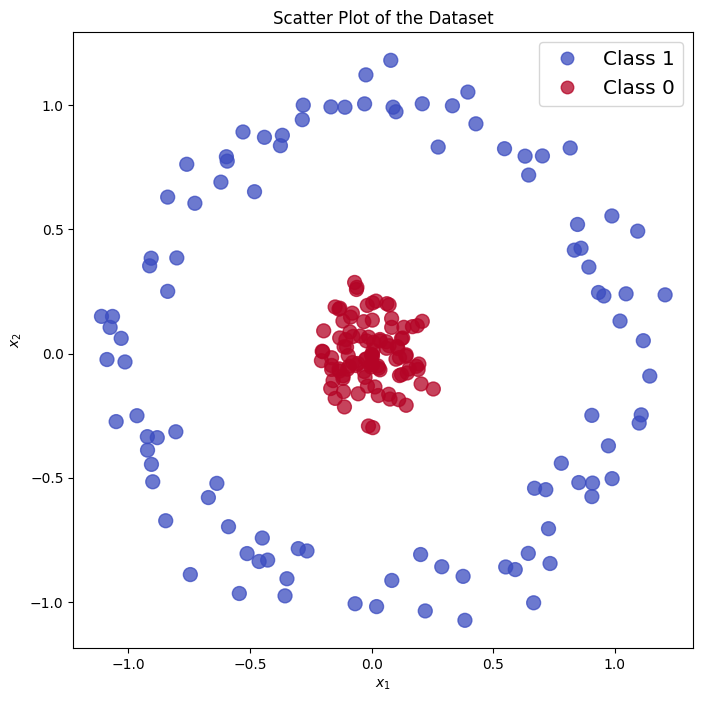

In [42]:
plt.figure(figsize=(8,8))
scatter = plt.scatter(X[:, 0], X[:, 1], marker='o', c=y, s=100, cmap='coolwarm', alpha=0.75)
plt.legend(handles=scatter.legend_elements()[0], labels=['Class 1','Class 0'], fontsize='x-large', markerscale=1.5)
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")
plt.title("Scatter Plot of the Dataset")
plt.show()

##### <font color="#008080" face="Times New Roman" size=4> - Pre-Processing </font>

In [43]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

#### <font color="#008080" face="Times New Roman" size=4>**Model**</font>

In [45]:
from sklearn.svm import SVC

#Build the classifier
clf = SVC(kernel='linear', C=10)

#### <font color="#008080" face="Times New Roman" size=4>**Train**</font>

In [46]:
# Fit the model on the train data
clf.fit(X_train, y_train)

SVC(C=10, kernel='linear')

#### <font color="#008080" face="Times New Roman" size=4>**Evaluation**</font>

##### <font color="#008080" face="Times New Roman" size=4> - Prediction</font>

In [47]:
# Predict the model on test data
y_pred_test = clf.predict(X_test)

##### <font color="#008080" face="Times New Roman" size=4> - Accuracy </font>

In [48]:
#Find the accuracy of model on test set by comparing the predicted labels with their true values
accuracy = np.sum(y_test==y_pred_test) / len(y_test)

print("Maximal Margin Classifier Accuracy:", accuracy*100, "%")

Maximal Margin Classifier Accuracy: 52.5 %


#### <font color="#008080" face="Times New Roman" size=4>**Visualization**</font>

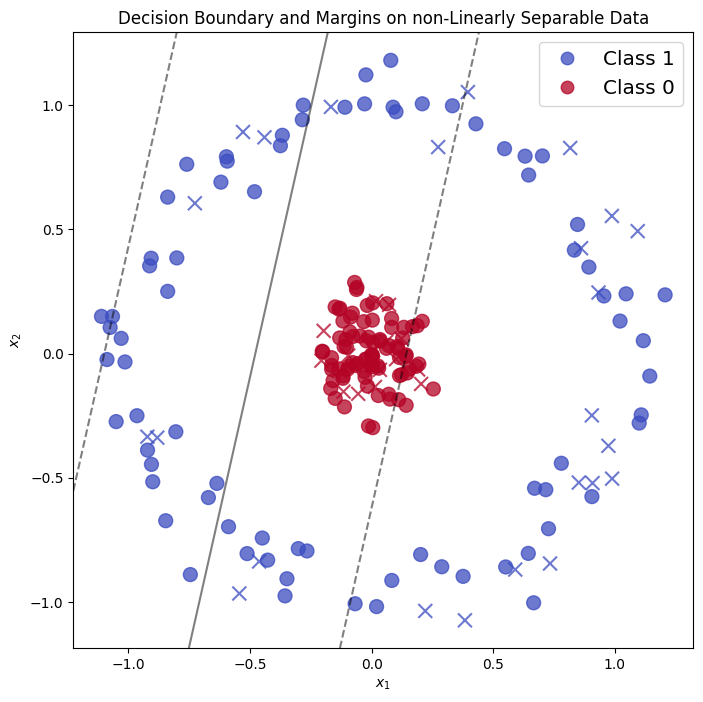

In [50]:
def plot_svc_decision_function(clf, ax=None):
    """Plot the decision function for a 2D SVC"""
    if ax is None:
        ax = plt.gca()

    x = np.linspace(plt.xlim()[0], plt.xlim()[1], 30)
    y = np.linspace(plt.ylim()[0], plt.ylim()[1], 30)
    Y, X = np.meshgrid(y, x)

    P = np.zeros_like(X)
    for i, xi in enumerate(x):
        for j, yj in enumerate(y):
            P[i, j] = clf.decision_function([[xi, yj]])

    # plot the margins
    ax.contour(X, Y, P, colors='k',
               levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])

plt.figure(figsize=(8, 8))
train_plt = plt.scatter(X_train[:, 0], X_train[:, 1], marker='o', c=y_train, cmap='coolwarm', s=100, alpha=0.75)
test_plt = plt.scatter(X_test[:, 0], X_test[:, 1], marker="x", c=y_test, cmap='coolwarm', s=100, alpha=0.75)
plot_svc_decision_function(clf)
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")
plt.title("Decision Boundary and Margins on non-Linearly Separable Data")
plt.legend(handles=train_plt.legend_elements()[0], labels=['Class 1','Class 0'], fontsize='x-large', markerscale=1.5)
plt.show()

<font face="Times New Roman"><div id="1-3-2">
### <font color="#800080" size=5>**1-3-2. Introduction to Kernel**</font>
</div>

#### <font color="#008080" face="Times New Roman" size=4>**Dataset**</font>

##### <font color="#008080" face="Times New Roman" size=4> - Loading Dataset </font>

In [51]:
# create dataset
X2d, y = datasets.make_circles(200, factor=0.1, noise=0.1, random_state=1)

##### <font color="#008080" face="Times New Roman" size=4> - Pre-Processing </font>

In [52]:
#Add a new feature as: x_3 = x_1^2+x_2^2
X_3 = X2d[:,0]**2 + X2d[:, 1]**2
X3d = np.concatenate((X2d, X_3.reshape(-1,1)), axis=1)

##### <font color="#008080" face="Times New Roman" size=4> - Visualization </font>

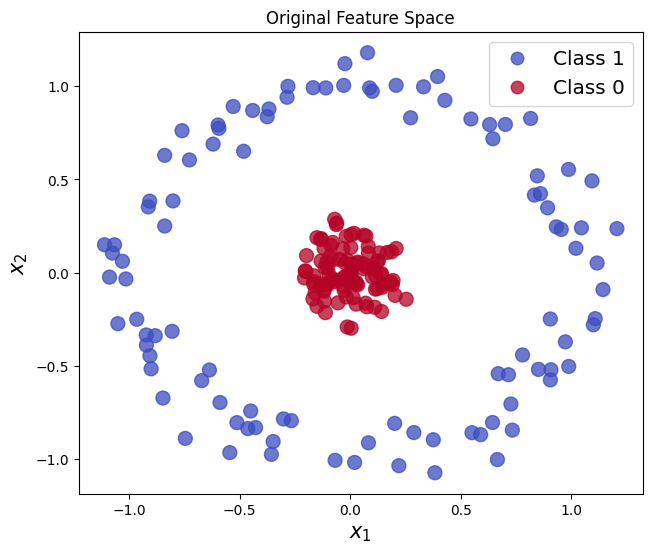

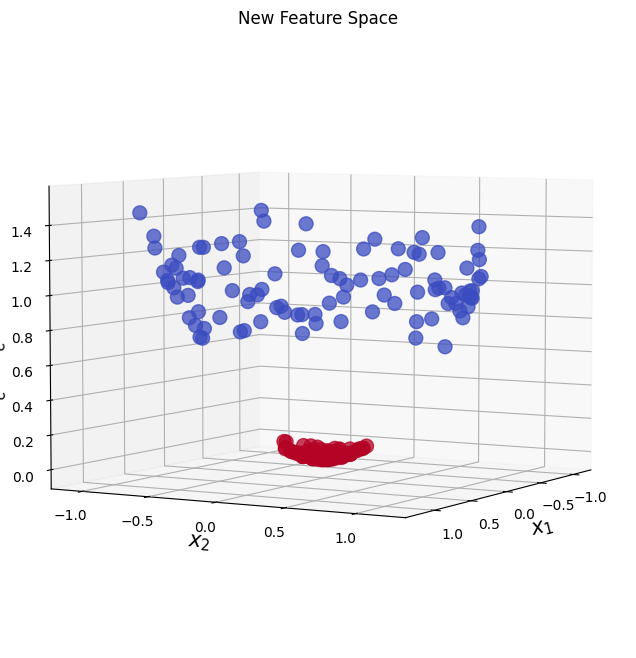

In [53]:
plt.figure(figsize=(16,6))
plt.subplot(1,2,1)
scatter2d = plt.scatter(X2d[:, 0], X2d[:, 1], marker='o', c=y, s=100, cmap='coolwarm', alpha=0.75)
plt.legend(handles=scatter2d.legend_elements()[0], labels=['Class 1','Class 0'], fontsize='x-large', markerscale=1.5)
plt.xlabel("$x_1$", fontsize=15)
plt.ylabel("$x_2$", fontsize=15)
plt.title("Original Feature Space")


fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter3D(X3d[:, 0], X3d[:, 1], X3d[:, 2], marker='o', c=y, s=100, cmap='coolwarm', alpha=0.75)
ax.view_init(elev=5, azim=30)
ax.set_xlabel('$x_1$', fontsize=15)
ax.set_ylabel('$x_2$', fontsize=15)
ax.set_zlabel('$x_3=x_1^2+x_2^2$', fontsize=15)
#plt.legend(labels=['Class 1','Class 0'], fontsize='x-large', markerscale=1.5)
ax.set_title('New Feature Space')
#ax.legend(['Class 1','Class 0'])
plt.show()

<font face="Times New Roman"><div id="1-3-3">
### <font color="#800080" size=5>**1-3-3. Polynomial Kernel**</font>
</div>

#### <font color="#008080" face="Times New Roman" size=4>**Dataset**</font>

##### <font color="#008080" face="Times New Roman" size=4> - Loading Dataset </font>

In [54]:
# create dataset
X, y = datasets.make_moons(n_samples=200,noise=0.15, random_state=0)

##### <font color="#008080" face="Times New Roman" size=4> - Visualization </font>

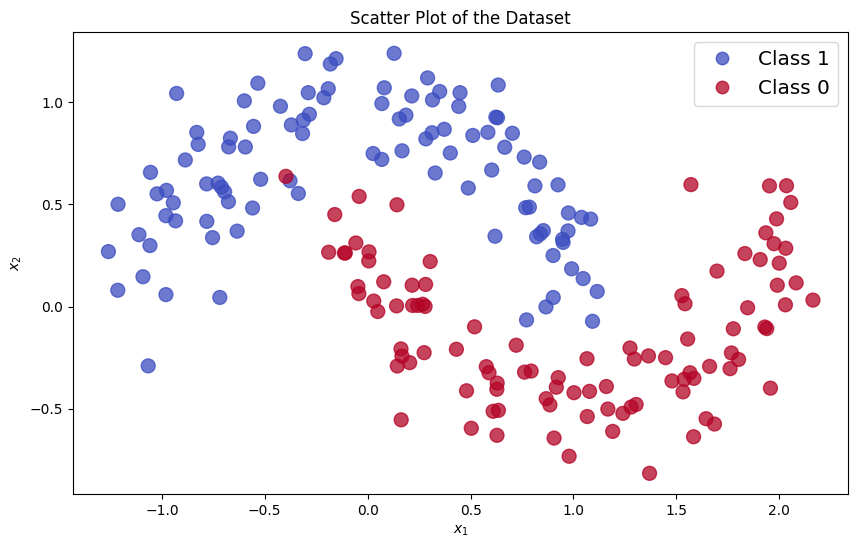

In [55]:
plt.figure(figsize=(10,6))
scatter = plt.scatter(X[:, 0], X[:, 1], marker='o', c=y, s=100, cmap='coolwarm', alpha=0.75)
plt.legend(handles=scatter.legend_elements()[0], labels=['Class 1','Class 0'], fontsize='x-large', markerscale=1.5)
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")
plt.title("Scatter Plot of the Dataset")
plt.show()

#### <font color="#008080" face="Times New Roman" size=4>**Model**</font>

In [56]:
#a 3rd order poly kernel svc
clf = SVC(kernel='poly', degree=3, C=10)

#### <font color="#008080" face="Times New Roman" size=4>**Train**</font>

In [57]:
clf.fit(X, y)

SVC(C=10, kernel='poly')

#### <font color="#008080" face="Times New Roman" size=4>**Visualization**</font>

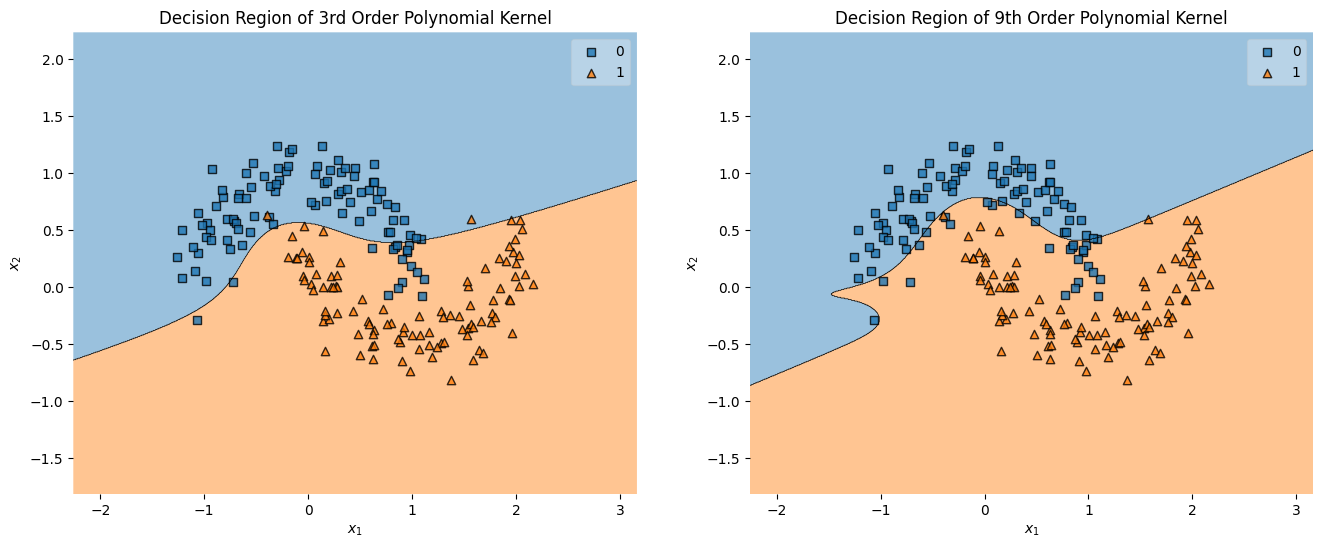

In [58]:
from mlxtend.plotting import plot_decision_regions
plt.figure(figsize=(16, 6))

plt.subplot(1,2,1)
plot_decision_regions(X, y, clf=clf, legend=1)
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")
plt.title("Decision Region of 3rd Order Polynomial Kernel")

#a 9th order poly kernel svc
clf = SVC(kernel='poly', degree=9, C=10)
clf.fit(X, y)
plt.subplot(1,2,2)
plot_decision_regions(X, y, clf=clf, legend=1)
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")
plt.title("Decision Region of 9th Order Polynomial Kernel");

<font face="Times New Roman"><div id="1-3-4">
### <font color="#800080" size=5>**1-3-4. Radial Basis Function (RBF)**</font>
</div>

#### <font color="#008080" face="Times New Roman" size=4>**Kernel Visualization**</font>

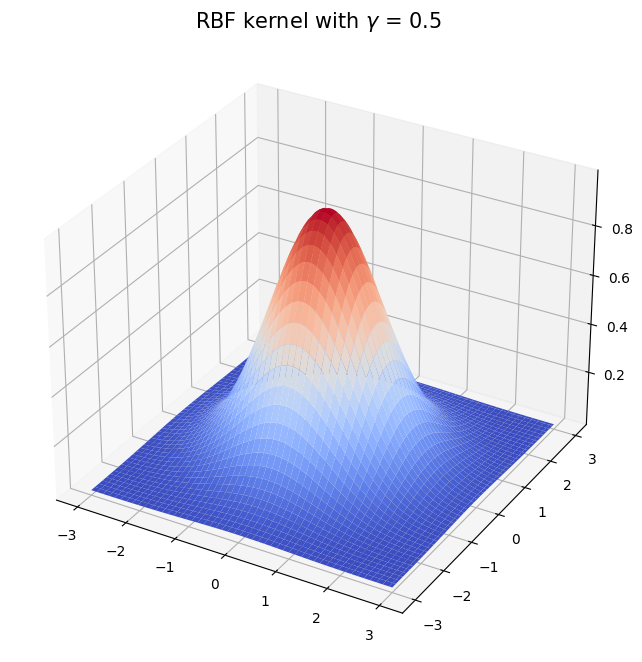

In [63]:
x1 = np.linspace(-3, 3, 100)
x2 = np.linspace(-3, 3, 100)
X1, X2 = np.meshgrid(x1, x2)

gamma = 0.5
R = np.exp(-gamma*(X1 ** 2 + X2 ** 2))

fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection='3d')

surf = ax.plot_surface(X1, X2, R, cmap=plt.cm.coolwarm)
plt.title('RBF kernel with $\gamma$ = {:.1f}'.format(gamma), fontsize=15)
plt.show()

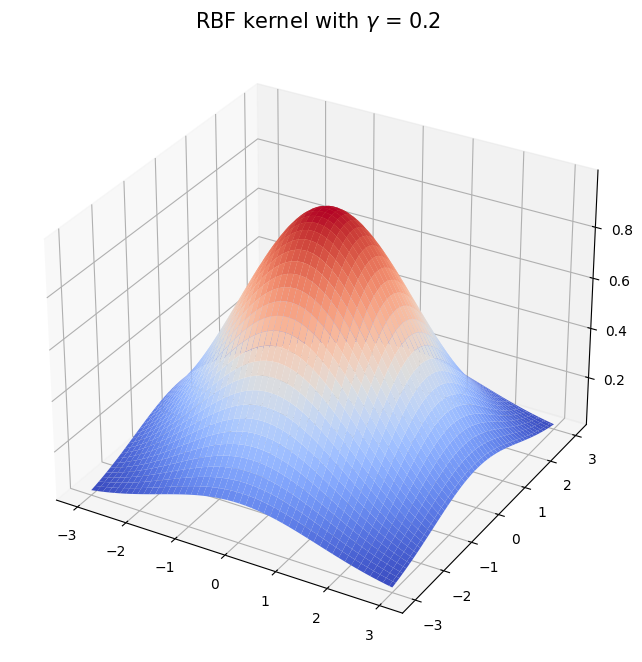

In [64]:
x1 = np.linspace(-3, 3, 100)
x2 = np.linspace(-3, 3, 100)
X1, X2 = np.meshgrid(x1, x2)

gamma = 0.2
R = np.exp(-gamma*(X1 ** 2 + X2 ** 2))

fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection='3d')

surf = ax.plot_surface(X1, X2, R, cmap=plt.cm.coolwarm)
plt.title('RBF kernel with $\gamma$ = {:.1f}'.format(gamma), fontsize=15)
plt.show()

#### <font color="#008080" face="Times New Roman" size=4>**Dataset 1**</font>

In [66]:
X, y = datasets.make_circles(n_samples=200, factor=0.1, noise=0.1, random_state=1)

#### <font color="#008080" face="Times New Roman" size=4>**Train Model**</font>

In [67]:
clf = SVC(kernel='rbf', gamma=0.7, C=10)
clf.fit(X, y)

SVC(C=10, gamma=0.7)

#### <font color="#008080" face="Times New Roman" size=4>**Visualization**</font>

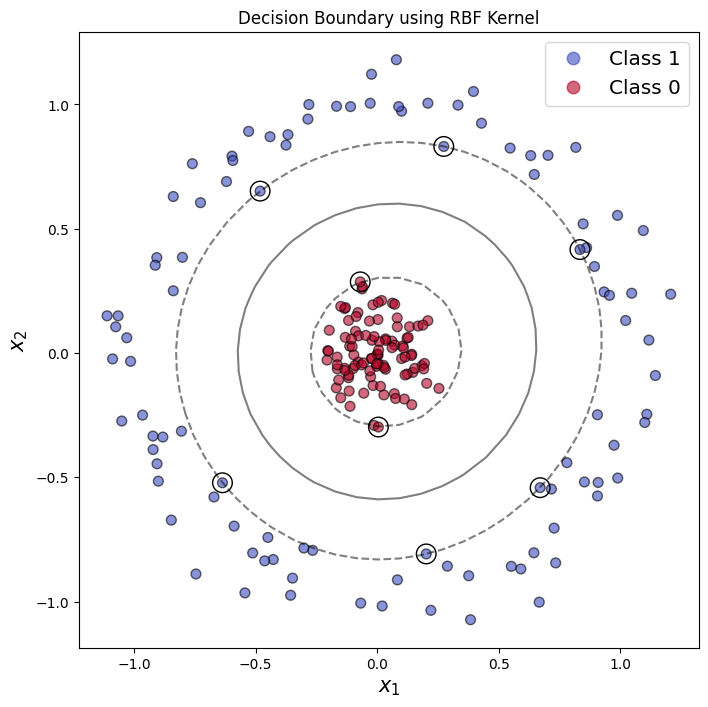

In [68]:
plt.figure(figsize=(8,8))
scatter = plt.scatter(X[:, 0], X[:, 1], c=y, s=50, edgecolors='black', cmap='coolwarm', alpha=0.6)
plot_svc_decision_function(clf)
plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=200, edgecolors='k', facecolors='none')
plt.legend(handles=scatter.legend_elements()[0], labels=['Class 1','Class 0'], fontsize='x-large', markerscale=1.5)
plt.xlabel("$x_1$", fontsize=15)
plt.ylabel("$x_2$", fontsize=15)
plt.title("Decision Boundary using RBF Kernel")
plt.show()

#### <font color="#008080" face="Times New Roman" size=4>**Dataset 2**</font>

In [69]:
X, y = datasets.make_moons(n_samples=200,noise=0.15, random_state=0)

#### <font color="#008080" face="Times New Roman" size=4>**Train Model**</font>

In [70]:
clf = SVC(kernel='rbf', gamma=0.8, C=5)
clf.fit(X, y)

SVC(C=5, gamma=0.8)

#### <font color="#008080" face="Times New Roman" size=4>**Visualization**</font>

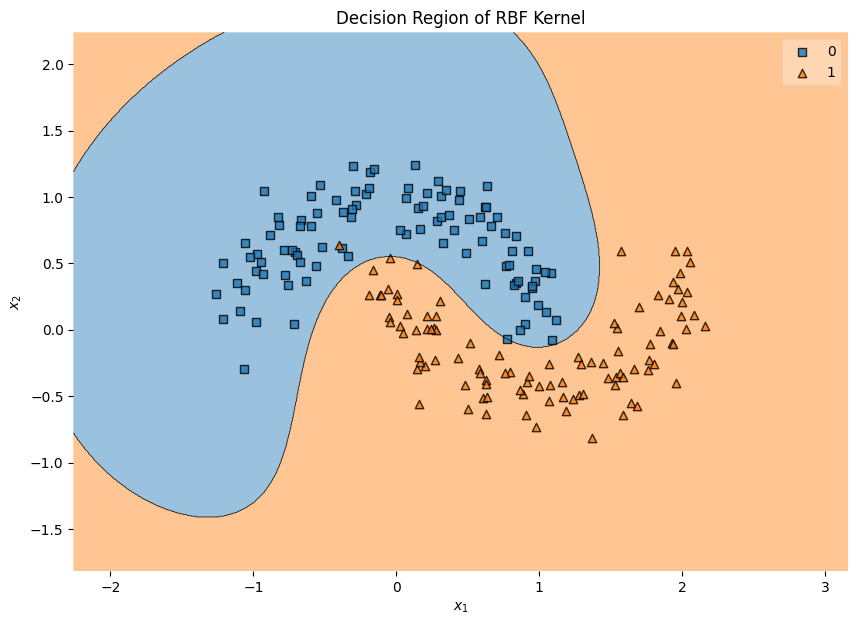

In [71]:
plt.figure(figsize=(10,7))
plot_decision_regions(X, y, clf=clf, legend=1)
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")
plt.title("Decision Region of RBF Kernel")
plt.show()

<font face="Times New Roman"><div id="1-4">
## <font color="#800080" size=6>**1-4. Multi-Class SVM**</font>
</div>

#### <font color="#008080" face="Times New Roman" size=4>**Dataset**</font>

##### <font color="#008080" face="Times New Roman" size=4> - Loading Dataset </font>

In [31]:
from sklearn import datasets

X, y = datasets.make_blobs(
    n_samples=300, n_features=2, centers=3, cluster_std=1.5, random_state=10
)

##### <font color="#008080" face="Times New Roman" size=4> - Visualization </font>

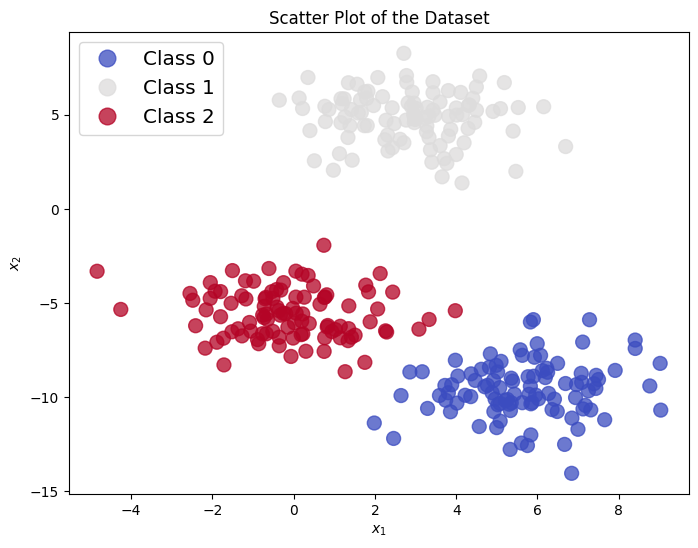

In [37]:
plt.figure(figsize=(8, 6))
scatter = plt.scatter(X[:, 0], X[:, 1], marker='o', c=y, s=100, cmap='coolwarm', alpha=0.75);
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")
plt.title("Scatter Plot of the Dataset")
plt.legend(handles=scatter.legend_elements()[0], labels=['Class 0','Class 1', 'Class 2'], fontsize='x-large', markerscale=2)
plt.show();

#### <font color="#008080" face="Times New Roman" size=4>**Model**</font>

In [38]:
from sklearn.svm import SVC
from mlxtend.plotting import plot_decision_regions

#Linear Kernel
clf = SVC(kernel='linear', decision_function_shape='ovo')

#### <font color="#008080" face="Times New Roman" size=4>**Train**</font>

In [39]:
clf.fit(X, y)

SVC(decision_function_shape='ovo', kernel='linear')

#### <font color="#008080" face="Times New Roman" size=4>**Visualization**</font>

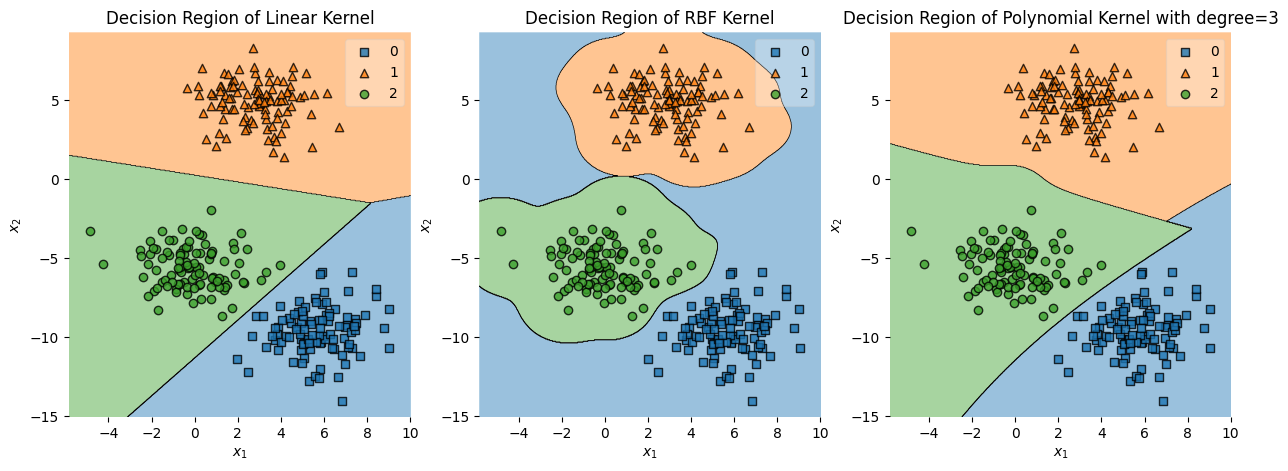

In [40]:
plt.figure(figsize=(15,5))


plt.subplot(1,3,1)
plot_decision_regions(X, y, clf=clf, legend=1)
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")
plt.title("Decision Region of Linear Kernel")

#RBF Kernel
clf = SVC(kernel='rbf', gamma=0.8, C=5, decision_function_shape='ovr')
clf.fit(X, y)

plt.subplot(1,3,2)
plot_decision_regions(X, y, clf=clf, legend=1)
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")
plt.title("Decision Region of RBF Kernel")

#Polynomial Kernel
clf = SVC(kernel='poly', degree=3, decision_function_shape='ovr')
clf.fit(X, y)

plt.subplot(1,3,3)
plot_decision_regions(X, y, clf=clf, legend=1)
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")
plt.title("Decision Region of Polynomial Kernel with degree=3")

plt.show()

<font face="Times New Roman"><div id="2">
# <font color="#800080" size=6>**2. Support Vector Regression (SVR)**</font>
</div>

#### <font color="#008080" face="Times New Roman" size=4>**Dataset**</font>

##### <font color="#008080" face="Times New Roman" size=4> - Creating Dataset </font>

In [19]:
X = np.sort(5 * np.random.rand(50, 1), axis=0)
y = np.sin(X).ravel() #y = sin(x)

#Add noise to targets
y[::5] += 3 * (0.5 - np.random.rand(10))

##### <font color="#008080" face="Times New Roman" size=4> - Visualization </font>

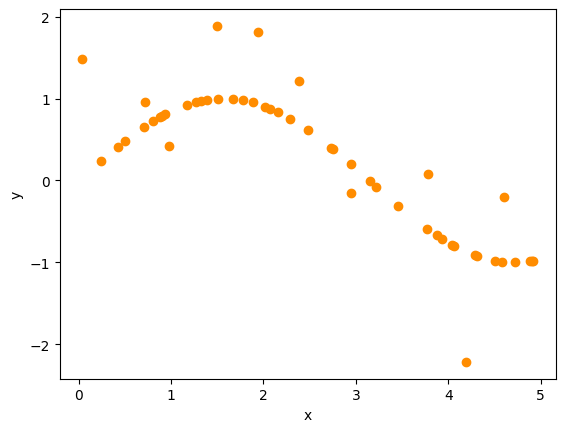

In [24]:
plt.scatter(X, y, color='darkorange', label='data')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

#### <font color="#008080" face="Times New Roman" size=4>**Model**</font>

In [22]:
from sklearn.svm import SVR

# Set the epsilon for the width of streets!
eps=0.2

# Linear Model
svr_lin = SVR(kernel='linear', C=1e3, epsilon=eps)

# RBF Model
svr_rbf = SVR(kernel="rbf", C=100, gamma=0.1, epsilon=eps)

# Polynomial Model
svr_poly = SVR(kernel="poly", C=100, degree=3, epsilon=eps)

#### <font color="#008080" face="Times New Roman" size=4>**Train**</font>

In [23]:
# Linear Model
y_lin = svr_lin.fit(X, y).predict(X)

# RBF Model
y_rbf = svr_rbf.fit(X, y).predict(X)

# Polynomial Model
y_poly = svr_poly.fit(X, y).predict(X)

#### <font color="#008080" face="Times New Roman" size=4>**Visualization**</font>

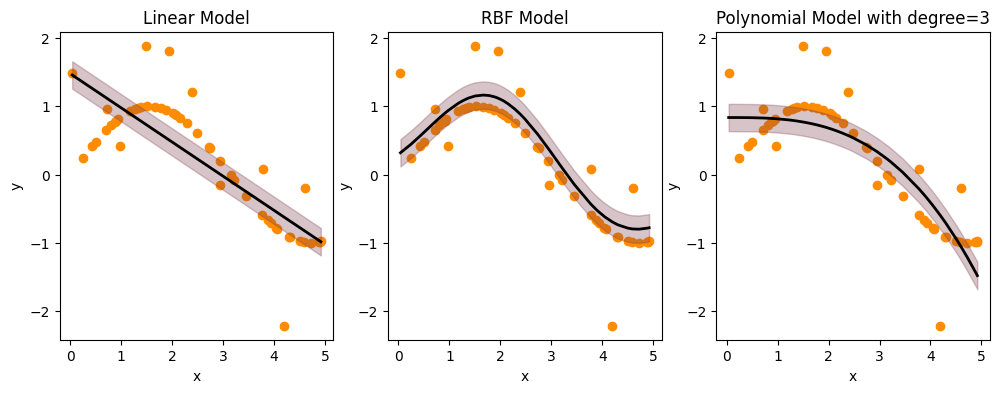

In [30]:
plt.figure(figsize=(12, 4))

plt.subplot(1,3,1)
plt.scatter(X, y, color='darkorange', label='data')
plt.plot(X, y_lin, color='k', lw=2)
plt.title('Linear Model')
plt.xlabel('x')
plt.ylabel('y')
plt.fill_between(X.ravel(), y_lin - eps, y_lin + eps, edgecolor='none', color='#7D3C4A', alpha=0.3)

plt.subplot(1,3,2)
plt.scatter(X, y, color='darkorange')
plt.plot(X, y_rbf, color='k', lw=2)
plt.title('RBF Model')
plt.xlabel('x')
plt.ylabel('y')
plt.fill_between(X.ravel(), y_rbf - eps, y_rbf + eps, edgecolor='none', color='#7D3C4A', alpha=0.3)

plt.subplot(1,3,3)
plt.scatter(X, y, color='darkorange', label='data')
plt.plot(X, y_poly, color='k', lw=2)
plt.title('Polynomial Model with degree=3')
plt.xlabel('x')
plt.ylabel('y')
plt.fill_between(X.ravel(), y_poly - eps, y_poly + eps, edgecolor='none', color='#7D3C4A', alpha=0.3)
plt.show()

<font face="Times New Roman"><div id="3">
# <font color="#800080" size=6>**3. Model evaluation criteria**</font>
</div>

#### <font color="#008080" face="Times New Roman" size=4>**Dataset**</font>

##### <font color="#008080" face="Times New Roman" size=4> - Introduction to Dataset </font>

##### <font color="#008080" face="Times New Roman" size=4> - Loading Dataset </font>

In [2]:
import numpy as np
from sklearn.datasets import fetch_openml

mnist = fetch_openml('mnist_784', version=1, as_frame=False)
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [3]:
X, y = mnist["data"], mnist["target"]
y = y.astype(np.uint8)
print(X.shape, y.shape)

(70000, 784) (70000,)


##### <font color="#008080" face="Times New Roman" size=4> - Visualizing Dataset </font>

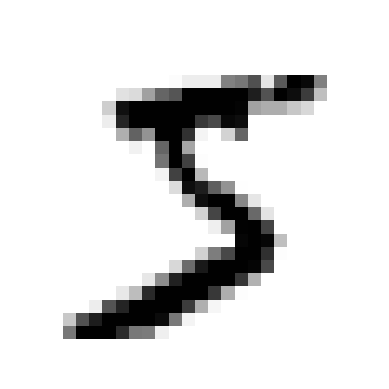

In [4]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

def plot_digit(data):
    image = data.reshape(28, 28)
    plt.imshow(image, cmap = mpl.cm.binary,
               interpolation="nearest")
    plt.axis("off")


digit = X[0]
plot_digit(digit)

##### <font color="#008080" face="Times New Roman" size=4> - Pre-Processing Dataset</font>

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

y_train_5 = (y_train == 5)
y_test_5 = (y_test == 5)

y_train_5

array([False, False, False, ..., False, False, False])

#### <font color="#008080" face="Times New Roman" size=4>**Train Model**</font>

In [6]:
from sklearn.svm import SVC

svm_clf = SVC(kernel='rbf', C = 0.03, random_state=42)
svm_clf.fit(X_train, y_train_5)

SVC(C=0.03, random_state=42)

In [7]:
svm_clf.predict([digit])

array([ True])

<font face="Times New Roman"><div id="3-1">
## <font color="#800080" size=6>**3-1. Accuracy**</font>
</div>

In [8]:
from sklearn.metrics import accuracy_score

svm_clf_predictions = svm_clf.predict(X_test)
accuracy = accuracy_score(y_test_5, svm_clf_predictions)

print("Accuracy of the 5 classifier is:", accuracy)

Accuracy of the 5 classifier is: 0.9729714285714286


In [10]:
from sklearn.base import BaseEstimator

class Never5Classifier(BaseEstimator):
    def fit(self, X, y=None):
        pass
    def predict(self, X):
        return np.zeros((len(X), 1), dtype=bool)

In [11]:
never_5_clf = Never5Classifier()
never_5_clf_predictions = never_5_clf.predict(X_test)
accuracy_score(y_test_5, never_5_clf_predictions)

0.9081714285714285

<font face="Times New Roman"><div id="3-2">
## <font color="#800080" size=6>**3-2. Confusion Matrix**</font>
</div>

In [9]:
from sklearn.metrics import confusion_matrix

svm_confusion_matrix = confusion_matrix(y_test_5, svm_clf_predictions)
print(svm_confusion_matrix)

[[15887     6]
 [  467  1140]]


<font face="Times New Roman"><div id="3-3">
## <font color="#800080" size=6>**3-3. Precision/Recall**</font>
</div>

In [12]:
from sklearn.metrics import precision_score, recall_score

svm_y_train_pred = svm_clf.predict(X_train)
print('Precision =', precision_score(y_train_5, svm_y_train_pred))
print('Recall =', recall_score(y_train_5, svm_y_train_pred))

Precision = 0.9943045563549161
Recall = 0.704844878878028


<font face="Times New Roman"><div id="3-3-1">
### <font color="#800080" size=5>**3-3-1. Precision/Recall tradeoff**</font>
</div>

In [13]:
from sklearn.metrics import precision_recall_curve

# Get the scores for train set predictions
svm_train_scores = svm_clf.decision_function(X_train)

precisions, recalls, thresholds = precision_recall_curve(y_train_5, svm_train_scores)

thresholds

array([-2.82740324, -2.72198694, -2.66664357, ...,  1.85226769,
        1.89011781,  1.96884864])

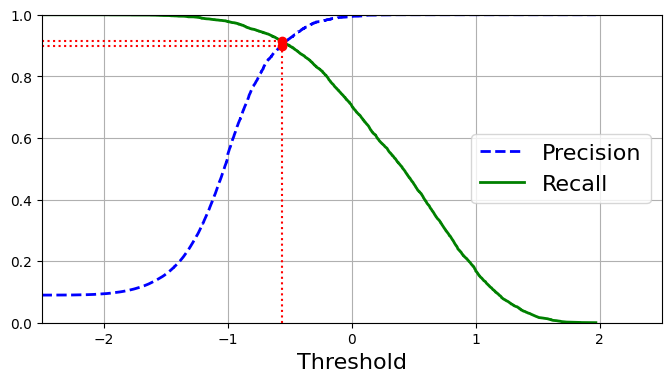

In [14]:
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision", linewidth=2)
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall", linewidth=2)
    plt.legend(loc="center right", fontsize=16)
    plt.xlabel("Threshold", fontsize=16)
    plt.grid(True)
    plt.axis([-2.5, 2.5, 0, 1])



recall_90_precision = recalls[np.argmax(precisions >= 0.90)]
threshold_90_precision = thresholds[np.argmax(precisions >= 0.90)]


plt.figure(figsize=(8, 4))
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
plt.plot([threshold_90_precision, threshold_90_precision], [0., 0.9], "r:")
plt.plot([-2.5, threshold_90_precision], [0.9, 0.9], "r:")
plt.plot([-2.5, threshold_90_precision], [recall_90_precision, recall_90_precision], "r:")
plt.plot([threshold_90_precision], [0.9], "ro")
plt.plot([threshold_90_precision], [recall_90_precision], "ro")
plt.show()

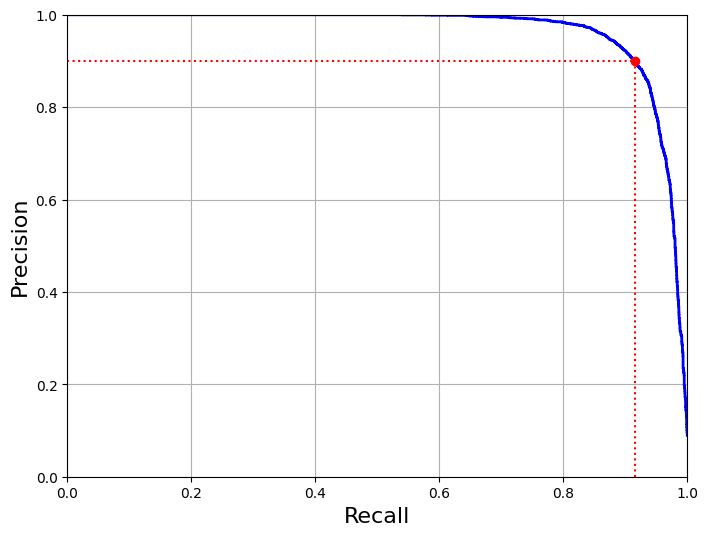

In [15]:
def plot_precision_vs_recall(precisions, recalls):
    plt.plot(recalls, precisions, "b-", linewidth=2)
    plt.xlabel("Recall", fontsize=16)
    plt.ylabel("Precision", fontsize=16)
    plt.axis([0, 1, 0, 1])
    plt.grid(True)

plt.figure(figsize=(8, 6))
plot_precision_vs_recall(precisions, recalls)
plt.plot([recall_90_precision, recall_90_precision], [0., 0.9], "r:")
plt.plot([0.0, recall_90_precision], [0.9, 0.9], "r:")
plt.plot([recall_90_precision], [0.9], "ro")
plt.show()

In [16]:
threshold_90_recall = thresholds[np.argmax(recalls >= 0.90)]
print("Threshold value for 90% recall =", threshold_90_recall)

Threshold value for 90% recall = -2.8274032359600163


In [17]:
svm_y_train_pred_90 = (svm_train_scores >= threshold_90_precision)
print("Precision =", precision_score(y_train_5, svm_y_train_pred_90))
print("Recall =", recall_score(y_train_5, svm_y_train_pred_90))

Precision = 0.9001044932079415
Recall = 0.9152146196345091


<font face="Times New Roman"><div id="3-4">
## <font color="#800080" size=6>**3-4. F1 Score**</font>
</div>

In [18]:
from sklearn.metrics import f1_score

print("F1_score =", f1_score(y_train_5, svm_y_train_pred))

F1_score = 0.8249191743347426


<font face="Times New Roman"><div id="3-5">
## <font color="#800080" size=6>**3-5. ROC Curve**</font>
</div>

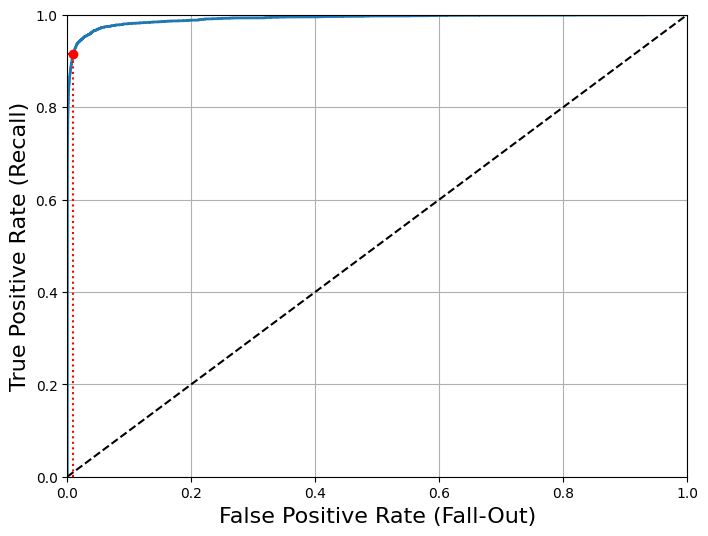

In [20]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_train_5, svm_train_scores)

def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--') # dashed diagonal
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate (Fall-Out)', fontsize=16)
    plt.ylabel('True Positive Rate (Recall)', fontsize=16)
    plt.grid(True)

plt.figure(figsize=(8, 6))
plot_roc_curve(fpr, tpr)
fpr_90 = fpr[np.argmax(tpr >= recall_90_precision)]
plt.plot([fpr_90, fpr_90], [0., recall_90_precision], "r:")
plt.plot([0.0, fpr_90], [recall_90_precision, recall_90_precision], "r:")
plt.plot([fpr_90], [recall_90_precision], "ro")
plt.show()

<font face="Times New Roman"><div id="3-6">
## <font color="#800080" size=6>**3-6. Area Under the Curve (AUC)**</font>
</div>

In [21]:
from sklearn.metrics import roc_auc_score

print("AUC =", roc_auc_score(y_train_5, svm_train_scores))

AUC = 0.9916184997517591


<font face="Times New Roman"><div id="2">
# <font color="#008080" size=6>**References**</font>
</div>


- GeÌron, A. (2019). Hands-on machine learning with Scikit-Learn, Keras and TensorFlow: concepts, tools, and techniques to build intelligent systems (2nd ed.). O’Reilly.

- https://github.com/asharifiz/Introduction_to_Machine_Learning/blob/main/Slides/Chapter_02_Classical_Models/Clustering/section%202-3.pdf

- <a href="https://aiaspirant.com/optimal-k-in-k-menas/">pic source</a>
